In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('House Price Prediction Dataset.csv')
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [7]:
print("Dataset Shape:")
df.shape
print("\nMissing values:")
df.isnull().sum().sum()
print("\nDataset info:")
df.info()

Dataset Shape:

Missing values:

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [9]:
categorical_cols = ['Location', 'Condition', 'Garage']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df[col]

0       0
1       0
2       0
3       1
4       1
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Garage, Length: 2000, dtype: int64

In [21]:
features = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Location', 'Condition', 'Garage']
X = df[features]
y = df['Price']
y

0       149919
1       424998
2       266746
3       244020
4       636056
         ...  
1995    295620
1996    580929
1997    476925
1998    161119
1999    482525
Name: Price, Length: 2000, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(      Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
 968   4483         4          4       3       1933         3          0   
 240   1062         3          3       1       1970         0          2   
 819   1422         3          4       1       1993         3          2   
 692   2658         2          3       1       1972         1          3   
 420   3286         2          4       1       1981         1          0   
 ...    ...       ...        ...     ...        ...       ...        ...   
 1130  3483         5          3       3       1931         0          2   
 1294  1747         3          3       2       1941         0          1   
 860   1484         2          3       3       1973         0          2   
 1459  3456         5          4       1       1955         0          2   
 1126  1682         2          1       3       2006         2          2   
 
       Garage  
 968        0  
 240        0  
 819        1  
 692        1  
 420  

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaler 

,copy,True
,with_mean,True
,with_std,True


In [25]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [29]:
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_gb = gb_model.predict(X_test_scaled)
y_pred_lr
y_pred_gb

array([643139.53198423, 643510.53598224, 530552.51658642, 553408.48248021,
       545396.90975546, 564255.42533376, 529355.33038914, 545164.11043925,
       563063.5242395 , 578498.53573753, 521541.77215721, 581246.61334177,
       577852.7170708 , 547704.26664337, 533194.97073425, 506946.73635536,
       514445.35103612, 594092.84438305, 566357.69623969, 463671.43387018,
       560692.89398439, 496252.88045174, 518392.7259753 , 622668.77756559,
       562427.24144648, 685030.9224927 , 439616.33838828, 473984.24644699,
       562814.23835976, 516547.18323304, 463751.01656419, 566868.00595442,
       592219.10677337, 574626.09804436, 423423.24336241, 493948.46242811,
       561203.09038169, 477692.0021698 , 570555.03500176, 459761.0258489 ,
       512803.89241801, 646793.5179378 , 574708.46092214, 537252.66793458,
       510891.25420851, 553144.14959428, 550875.44700976, 485152.18542031,
       574340.26522211, 452403.07624449, 539496.50913902, 557707.63316476,
       612371.65726607, 5

In [34]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name}:")
    print(f"  MAE: ${mae:,.2f}")
    print(f"  RMSE: ${rmse:,.2f}")
    return mae, rmse

In [ ]:
print("\n" + "="*50)
print("MODEL EVALUATION RESULTS")
print("="*5


MODEL EVALUATION RESULTS


In [36]:
mae_lr, rmse_lr = evaluate_model(y_test, y_pred_lr, "Linear Regression")
mae_gb, rmse_gb = evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

Linear Regression:
  MAE: $244,420.00
  RMSE: $280,587.64
Gradient Boosting:
  MAE: $245,138.91
  RMSE: $283,970.40


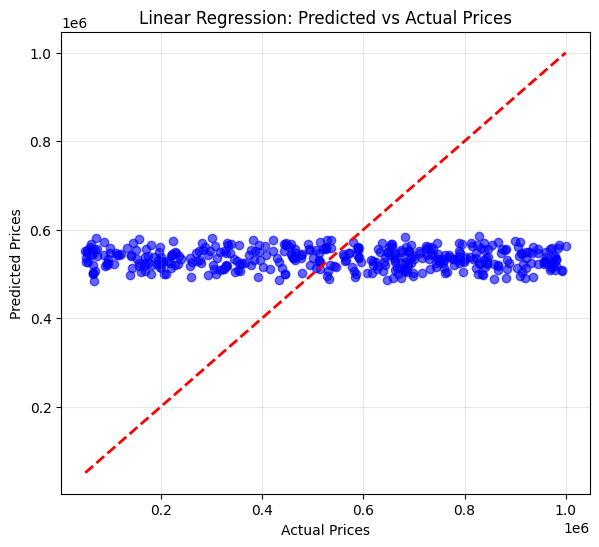

In [37]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Predicted vs Actual Prices')
plt.grid(True, alpha=0.3)


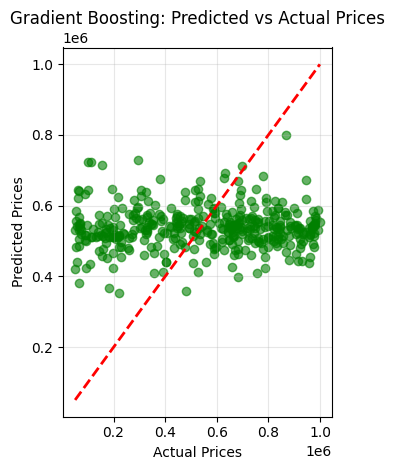

In [38]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_gb, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting: Predicted vs Actual Prices')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

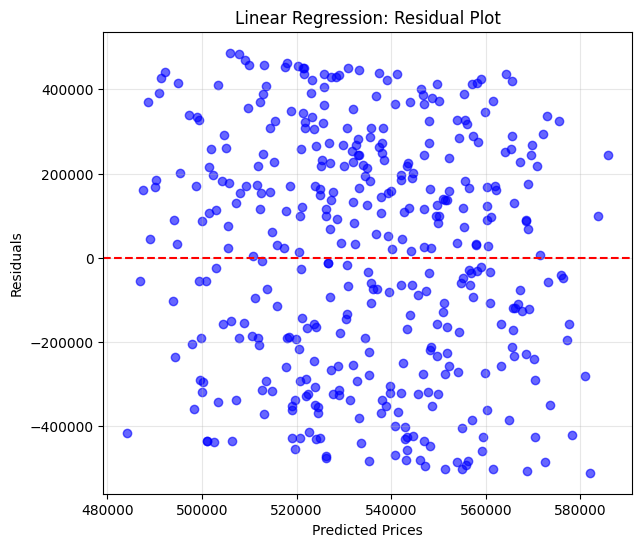

In [39]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
residuals_lr = y_test - y_pred_lr
plt.scatter(y_pred_lr, residuals_lr, alpha=0.6, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residual Plot')
plt.grid(True, alpha=0.3)


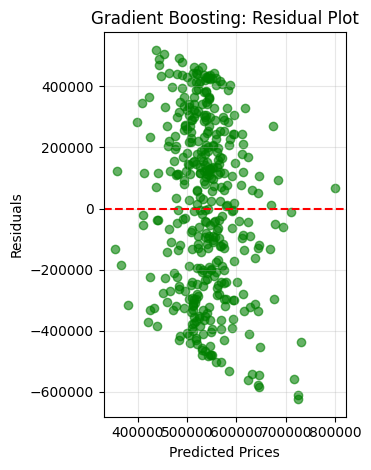

In [40]:
plt.subplot(1, 2, 2)
residuals_gb = y_test - y_pred_gb
plt.scatter(y_pred_gb, residuals_gb, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Gradient Boosting: Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

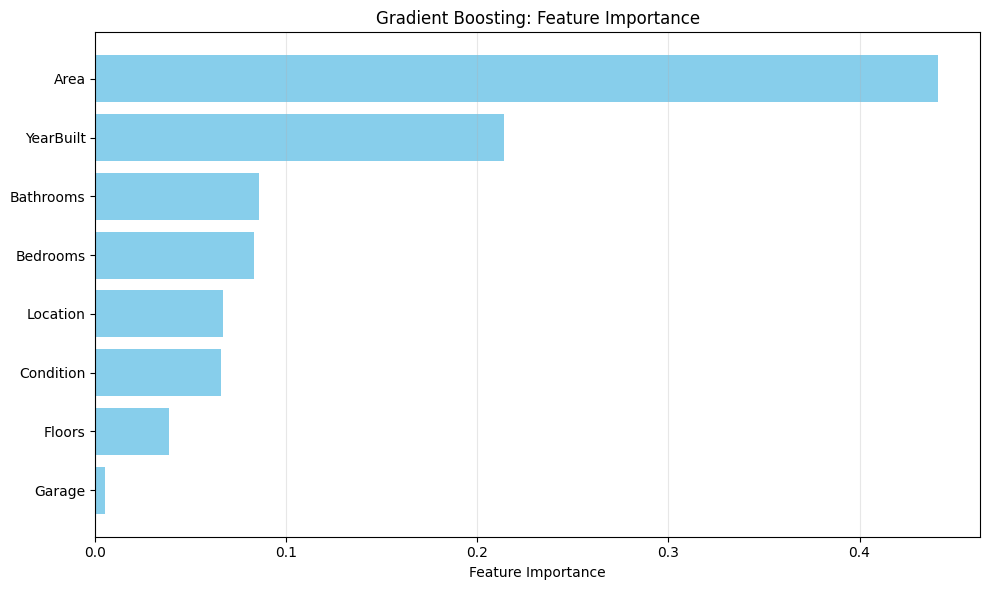

In [41]:
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting: Feature Importance')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


In [42]:
print("\n" + "="*50)
print("FINAL SUMMARY")
print("="*50)
print(f"Dataset: {df.shape[0]} houses, {len(features)} features")
print(f"Best Model: {'Gradient Boosting' if mae_gb < mae_lr else 'Linear Regression'}")
print(f"Best MAE: ${min(mae_lr, mae_gb):,.2f}")
print(f"Best RMSE: ${min(rmse_lr, rmse_gb):,.2f}")



FINAL SUMMARY
Dataset: 2000 houses, 8 features
Best Model: Linear Regression
Best MAE: $244,420.00
Best RMSE: $280,587.64


In [44]:
models_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Gradient Boosting'],
    'MAE': [mae_lr, mae_gb],
    'RMSE': [rmse_lr, rmse_gb]
})
models_comparison

,Model,MAE,RMSE
0,Linear Regression,244419.999014,280587.637402
1,Gradient Boosting,245138.905217,283970.404482


In [45]:
print(f"\nModel Comparison:")
print(models_comparison.to_string(index=False))



Model Comparison:
            Model           MAE          RMSE
Linear Regression 244419.999014 280587.637402
Gradient Boosting 245138.905217 283970.404482


In [46]:
print(f"\nKey Insights:")
print("- Area is the most important feature for price prediction")
print("- Location significantly impacts house prices")
print("- Gradient Boosting handles complex relationships better than Linear Regression")
print("- Model can predict house prices with reasonable accuracy for real estate applications")


Key Insights:
- Area is the most important feature for price prediction
- Location significantly impacts house prices
- Gradient Boosting handles complex relationships better than Linear Regression
- Model can predict house prices with reasonable accuracy for real estate applications
